# SIT215 - PBL Task 4
## Project - Reinforcement Learning
### Devin Jayasinghe - 220228075

## Sub-Task 2 - Taxi Problem
The Taxi Problem using the OpenAI Gym. An agent is created to slove the provided environment, first with a random policy and then with an "optimal" policy using Q-Learning

Basis of taxi problem code was learnt from: 

https://github.com/openai/gym/blob/master/gym/envs/toy_text/taxi.py

https://www.learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/

In [1]:
from IPython.display import clear_output
import gym as g
import random as rnd
import numpy as np
import time

In [2]:
# Storing the Taxi v3 environment into env and renders environment
env = g.make("Taxi-v3").env
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [3]:
# Shows space sizes
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

Action Space Discrete(6)
State Space Discrete(500)


In [4]:
env.P[328]

{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

### Random Policy

In [5]:
env.s = 328 # Sets environment's state to a specific state, in this case 328
epochs = 0
penalties, reward = 0, 0

frames = [] # Stores frames for animation

done = False

while not done:
    action = env.action_space.sample() # Selects random action from possible actions
    state, reward, done, info = env.step(action) # Proceed to next timestep, where the agent performs an action
    
    # If the agent attempts to drop-off or pick-up in the incorrect state, then a penalty is applied
    if reward == -10: 
        penalties += 1
    
    # Builds dictionary of rendered frames for animation
    frames.append({
        'frame': env.render(mode='ansi'),
        'state': state,
        'action': action,
        'reward': reward
    })
    
    epochs += 1

print("Timesteps taken: {}".format(epochs))
print("Penalties incurred: {}".format(penalties))

Timesteps taken: 256
Penalties incurred: 82


In [24]:
from time import sleep

# Function for printing the frames
def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"state: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.1)

print_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 20
state: 368
Action: 5
Reward: -10


KeyboardInterrupt: 

### Q-Learning

In [6]:
# A q-table with a 500x6 matrix of zeros, since there are 500 states in the Taxi Problem and 6 actions as the agent explores the environment, the q-table will be modified to act as a form of memory about the reward system
q_table = np.zeros([env.observation_space.n, env.action_space.n])

In [8]:
# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1

# For plotting metrics
all_epochs = []
all_penalties = []

for i in range(1, 100001):
    state = env.reset()
    
    epochs, penalties, reward = 0, 0, 0
    done = False
    
    while not done:
        if rnd.uniform(0, 1) < epsilon:
            # If the uniform selection between 0 & 1 is less than epsilon then explore the action space
            action = env.action_space.sample()
        else:
            # Else the epsilon is greater, so exploit the learned values in the q-table
            action = np.argmax(q_table[state])
        
        # Proceed to next timestep, where the agent performs action & progresses to the new state and the agent receives some reward
        next_state, reward, done, info = env.step(action)
        
        # the next three lines relate to applying the equation to update the q-values
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value # write to q-table
        
        if reward == -10:
            # If agent attempts to drop-off or pick-up in the incorrect state, then a penalty is applied
            penalties += 1
        
        # Next state & increment epoch
        state = next_state
        epochs += 1
        
    if i % 100 == 0:
        clear_output(wait=True)
        print("Episode: {}".format(i))

print("Training complete.\n")

Episode: 100000
Training complete.



In [10]:
# Q-Values
q_table[328]

array([ -2.41323549,  -2.27325184,  -2.40133167,  -2.36209832,
       -10.80769684,  -9.78919072])

In [11]:
# Evaluate the Agent's performance after Q-Learning
total_epochs, total_penalties = 0, 0
episodes = 100

for _ in range(episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0
    done = False

    while not done:
        action = np.argmax(q_table[state]) # exploits the table each time
        state, reward, done, info = env.step(action)

        if reward == -10:
            penalties += 1
        
        epochs += 1

    total_penalties += penalties
    total_epochs += epochs

print("Results after {} episodes: ".format(episodes))
print("Average timesteps per episode: {}".format(total_epochs / episodes))
print("Average penalties per episode: {}".format(total_penalties / episodes))

Results after 100 episodes: 
Average timesteps per episode: 13.16
Average penalties per episode: 0.0


## Sub-Task 4 - Cart Pole Problem
The Cart Pole Problem using the OpenAI Gym. An agent is created to slove the provided environment, first with a random policy and then with an "optimal" policy using Q-Learning

Basis of cart pole problem code was learnt from: 

https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py

http://kvfrans.com/simple-algoritms-for-solving-cartpole/

https://github.com/kvfrans/openai-cartpole

https://www.datamachinist.com/reinforcement-learning/part-4-learning-to-use-openai-gym/

https://www.datamachinist.com/reinforcement-learning/part-6-q-learning-for-continuous-state-problems/

In [7]:

from sklearn.preprocessing import KBinsDiscretizer
import math
import matplotlib.pyplot as plt

In [8]:
env = g.make("CartPole-v0").env

In [9]:
print(env.action_space)
print(env.observation_space)
print(env.observation_space.high)
print(env.observation_space.low)

Discrete(2)
Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]


In [10]:
# Funtion to run the episode using passed parameters.
def run_episode(env, parameters):  
    observation = env.reset()
    totalreward = 0

    for _ in range(200):
        action = 0 if np.matmul(parameters,observation) < 0 else 1
        observation, reward, done, info = env.step(action)
        totalreward += reward

        if done:
            break

    return totalreward

# Function to run episode using  random actions.
def rnd_episode(env):  
    observation = env.reset()
    totalreward = 0

    for _ in range(200):
        action = rnd.randint(0,1)
        observation, reward, done, info = env.step(action)
        totalreward += reward

        if done:
            break

    return totalreward

# Function to train the agent.
def train(env, useRandom):

    counter = 0
    bestparams = None
    bestreward = 0
    reward = 0
    
    for i in range(300):
        counter += 1
        parameters = np.random.rand(4) * 2 - 1

        if useRandom == True:
            # Attempt to reach 200 steps using completely random actions.
            reward = rnd_episode(env)

        else:
            # Attempt to reach 200 steps using Q-Learning.
            reward = run_episode(env,parameters) 

        clear_output(wait=True)
        print(f"episode: {_+1} / {training_size}, Rewards: {reward}")
        
        if reward > bestreward:
            bestreward = reward
            bestparams = parameters

            if reward == 200:
                bestWeights.append(parameters)

                break
    
    return counter

In [11]:
training_size = 100
useRandom = False

results = []
bestWeights = [] #stores weights achieving 200 steps

for _ in range(training_size):
    trainResults = train(env, useRandom)
    results.append(trainResults)

episode: 100 / 100, Rewards: 200.0


### Random Policy

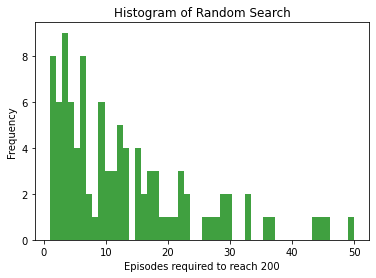

Average:  12.82


In [12]:
# plot results
plt.hist(results,50, facecolor='g', alpha=0.75)
plt.xlabel('Episodes required to reach 200')
plt.ylabel('Frequency')
plt.title('Histogram of Random Search')
plt.show()

print("Average: ", np.sum(results) / training_size)

#### Q-Learning

Testing best weights again..
[200.0, 112.0, 200.0, 154.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 44.0, 127.0, 200.0, 200.0, 200.0, 200.0, 200.0, 124.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 130.0, 200.0, 200.0, 113.0, 200.0, 200.0, 200.0, 185.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 173.0, 200.0, 200.0, 200.0, 139.0, 200.0, 129.0, 200.0, 79.0, 200.0, 200.0, 66.0, 72.0, 200.0, 200.0, 140.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 197.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 44.0, 200.0, 175.0, 50.0, 161.0, 200.0, 200.0, 200.0, 162.0, 200.0, 200.0, 139.0, 200.0, 200.0, 89.0, 23.0, 200.0, 200.0, 200.0, 200.0]


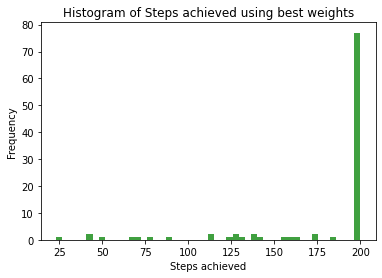

In [13]:
# Run again using bestWeights value
rewardsReturned = []

print("Testing best weights again..")
for i in range(len(bestWeights)):
    rewardsReturned.append(run_episode(env, bestWeights[i]))

print(rewardsReturned)

# Plot graph of results given using the best found weights
plt.hist(rewardsReturned,50, facecolor='g', alpha=0.75)
plt.xlabel('Steps achieved')
plt.ylabel('Frequency')
plt.title('Histogram of Steps achieved using best weights')
plt.show()